# Retrieving and visualizing traffic real-time data

## Libraries

In [298]:
import pandas as pd
from statistics import *
import sqlite3 as sql3
import matplotlib.pyplot as plt

## Functions

In [299]:
def from_table_to_df(db_name, table_name, time):
    query = 'SELECT * FROM ' + table_name
    conn = sql3.connect(db_name, timeout=time)
    sql_query = pd.read_sql_query(query, conn)
    df = pd.DataFrame(sql_query) 
    return df

In [300]:
def from_df_to_csv(df, csv_path):
    df.to_csv(csv_path)
    print(f'Table stored as .csv at {csv_path}')

In [301]:
def plot_map(df, time: str, date_time='date_time', lat='lat', lon='lon', actual_speed='actual_speed', free_flow='free_flow'):
    time_df = df.loc[df[date_time] == time]
    fig=plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.style.use('dark_background')
    for i in range(0,len(time_df[lat])):
        if(float(list(time_df[actual_speed])[i])/float(list(time_df['free_flow'])[i])<0.25):
            # print(f"({eval(row[1]['lat'])[i]}, {eval(row[1]['lon'])[i]}) --> brown")
            plt.plot(eval(list(time_df[lon])[i]), eval(list(time_df[lat])[i]), c='brown',linewidth=0.5)
        elif(float(list(time_df[actual_speed])[i])/float(list(time_df[free_flow])[i])<0.5):
            # print(f"({eval(row[1]['lat'])[i]}, {eval(row[1]['lon'])[i]}) --> red")
            plt.plot(eval(list(time_df[lon])[i]), eval(list(time_df[lat])[i]), c='red',linewidth=0.5)
        elif(float(list(time_df[actual_speed])[i])/float(list(time_df[free_flow])[i])<0.75):
            # print(f"({eval(row[1]['lat'])[i]}, {eval(row[1]['lon'])[i]}) --> yellow")
            plt.plot(eval(list(time_df[lon])[i]), eval(list(time_df[lat])[i]), c='yellow',linewidth=0.5)
        else:
            # print(f"({eval(row[1]['lat'])[i]}, {eval(row[1]['lon'])[i]}) --> green")
            plt.plot(eval(list(time_df[lon])[i]), eval(list(time_df[lat])[i]), c='green',linewidth=0.5)
    plt.title(str(time_df.iloc[1,][date_time]))
    plt.axis('off')
    plt.show()

In [302]:
def plot_trend(df, day: str, date_time='date_time', speed='uncapped_speed'):
    fig=plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    dates = []
    for time in list(df[date_time].unique()):
        date = time[:10]
        dates.append(date)
    if day not in dates:
        print(f'No data about {day}')
    else:
        hours = []
        mx = []
        mn = []
        avg = []
        for time in list(df[date_time].unique()):
            date = time[:10]
            if date == day:
                hour = time[10:]
                hours.append(hour)
                time_df = df.loc[df[date_time] == time]
                max_speed = max(time_df[speed])
                min_speed = min(time_df[speed])
                avg_speed = mean(time_df[speed])
                mx.append(max_speed)
                mn.append(min_speed)
                avg.append(avg_speed)
        plt.plot(hours, mx, 'o-', color='red')
        plt.plot(hours, mn, 'o-', color='green')
        plt.plot(hours, avg, 'o-', color='yellow')
        plt.title(day)
        plt.xlabel('Time (hour)')
        plt.ylabel('Speed (km/h)')
        plt.xticks(rotation=90)
        plt.show()

In [303]:
def plot_bars(df, day: str, date_time='date_time', speed='uncapped_speed'):
    fig=plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    dates = []
    for time in list(df[date_time].unique()):
        date = time[:10]
        dates.append(date)
    if day not in dates:
        print(f'No data about {day}')
    else:
        hours = []
        mx = []
        avg = []
        for time in list(df[date_time].unique()):
            date = time[:10]
            if date == day:
                hour = time[10:]
                hours.append(hour)
                time_df = df.loc[df[date_time] == time]
                max_speed = max(time_df[speed])
                avg_speed = mean(time_df[speed])
                mx.append(max_speed)
                avg.append(avg_speed)
        plt.bar(hours, mx)
        plt.plot(hours, avg, 'o-', color='yellow')
        plt.title(day)
        plt.xlabel('Time (hour)')
        plt.ylabel('Speed (km/h)')
        plt.xticks(rotation=90)
        plt.show()

In [315]:
def plot_jam(df, time: str, date_time='date_time', jam='jam_factor', lat='lat', lon='lon', actual_speed='actual_speed', free_flow='free_flow'):
    fig=plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    time_df = df.loc[df[date_time] == time]
    no_traffic = 0
    low_traffic = 0
    medium_traffic = 0
    high_traffic = 0
    colors = ['green','yellow','red','brown']
    for i in range(0,len(time_df[lat])):
        if(float(list(time_df[actual_speed])[i])/float(list(time_df['free_flow'])[i])<0.25):
            high_traffic += 1
        elif(float(list(time_df[actual_speed])[i])/float(list(time_df[free_flow])[i])<0.5):
            medium_traffic += 1
        elif(float(list(time_df[actual_speed])[i])/float(list(time_df[free_flow])[i])<0.75):
            low_traffic += 1
        else:
            no_traffic += 1
    traffic = [no_traffic, low_traffic, medium_traffic, high_traffic]
    plt.title(str(time_df.iloc[1,][date_time]))
    patches, texts, percentages = plt.pie(traffic, colors=colors, autopct='%1.1f%%')
    [percentages[i].set_color('black') for i in range(len(percentages))]
    plt.legend(patches, ['No traffic', 'Low traffic', 'Medium traffic', 'High traffic'], loc='best')
    plt.show()

In [305]:
def print_max(df, speed='uncapped_speed', date_time='date_time', n=3):
    dates = []
    max_speed_streets = {}
    for time in list(df[date_time].unique()):
        date = time[:10]
        dates.append(date)
        time_df = df.loc[df[date_time] == time]
        fake_df = time_df.copy()
        idxs = []
        for i in range(0, n):
            idx = int(fake_df[speed][fake_df[speed] == fake_df[speed].max()].index[0])
            idxs.append(idx)
            fake_df = fake_df.drop(idx, axis=0)
        sp_df = time_df.loc[idxs,]
        street_list = list(sp_df['name'])
        speeds_list = list(sp_df[speed])
        stsp_list = []
        for st, sp in zip(street_list, speeds_list):
            stsp_list.append((st, round(sp, 2)))
            max_speed_streets[date] = stsp_list
    for k, v in max_speed_streets.items():
        print(k)
        for name in v:
            print(name)
        print('----------------------------------------------------------------------------------------------------------------------')

## Execution

In [306]:
traffic_df = from_table_to_df('traffic_db_3107.db', 'traffic_table', 300)

In [307]:
# this is just temporary, since the fields' names have been wrongly assigned

traffic_df = traffic_df.rename(columns = {'lat':'len', 'lon':'lat', 'length':'lon'})

In [308]:
from_df_to_csv(traffic_df, 'traffic.csv')

Table stored as .csv at traffic.csv


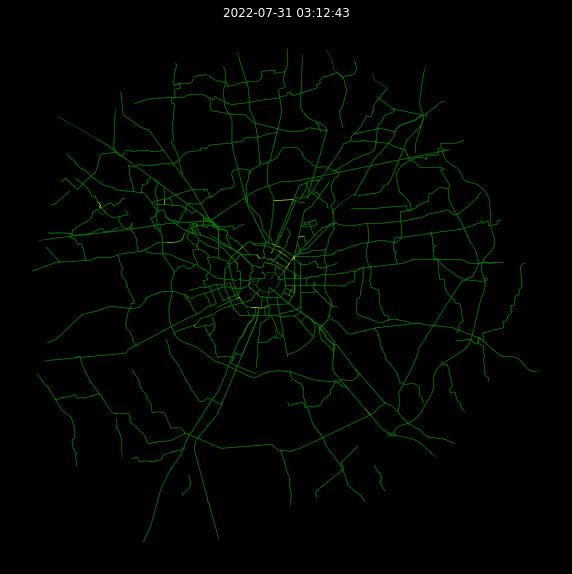

In [309]:
plot_map(traffic_df, '2022-07-31 03:12:43')

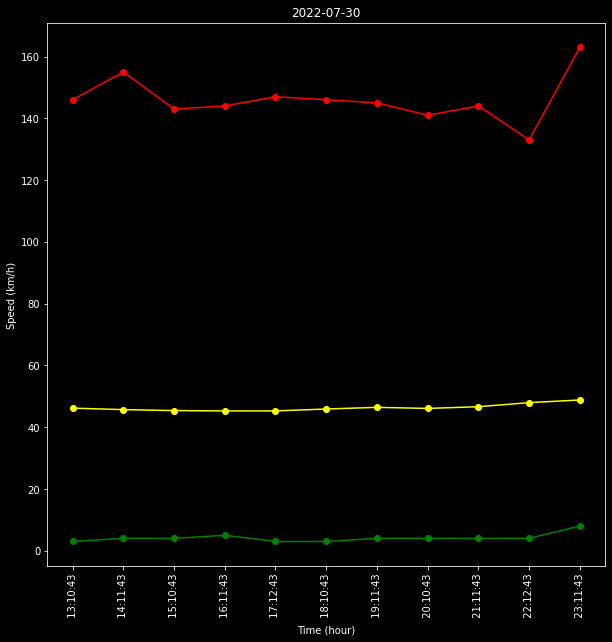

In [310]:
plot_trend(traffic_df, '2022-07-30')

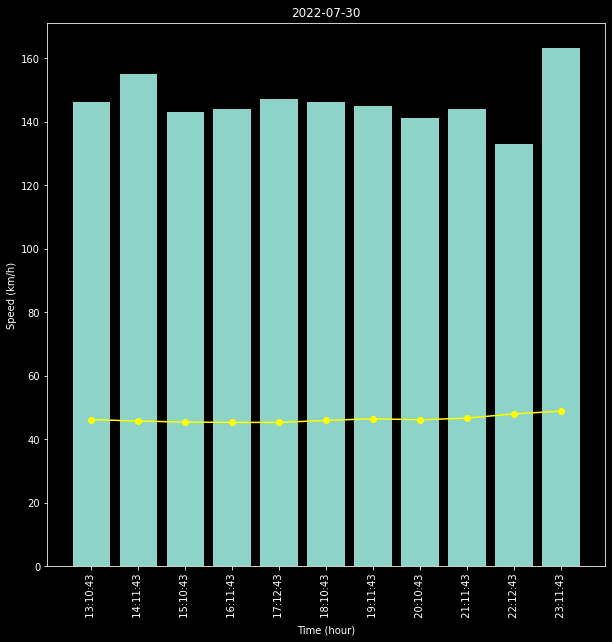

In [311]:
plot_bars(traffic_df, '2022-07-30')

In [312]:
print_max(traffic_df, 'actual_speed')

2022-07-30
('Binasco', 130.0)
('A35 - BreBeMi', 130.0)
('A58 - Teem', 130.0)
----------------------------------------------------------------------------------------------------------------------
2022-07-31
('Pessano Con Bornago', 130.0)
('A35 - BreBeMi', 130.0)
('Bereguardo - Allacciamento Raccordo Bereguardo-Pv', 130.0)
----------------------------------------------------------------------------------------------------------------------


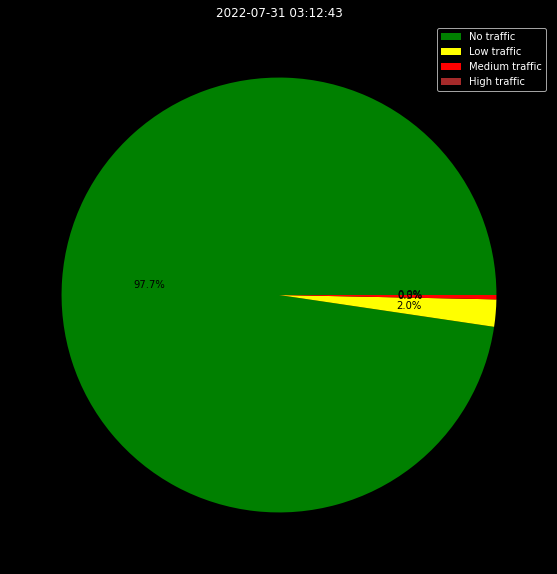

In [316]:
plot_jam(traffic_df, '2022-07-31 03:12:43')